# **Taller en clase**

### Nombre: Hernán Sánchez



Importamos e instalamos lo necesario para poder cargar la data y procesarla.

In [17]:
import kagglehub
import pandas as pd

path = kagglehub.dataset_download("rajneesh231/lex-fridman-podcast-transcript")
print("Path to dataset files:", path)

Path to dataset files: C:\Users\herna\.cache\kagglehub\datasets\rajneesh231\lex-fridman-podcast-transcript\versions\2


In [18]:
file_path = r'C:\Users\herna\.cache\kagglehub\datasets\rajneesh231\lex-fridman-podcast-transcript\versions\2\podcastdata_dataset.csv'
data = pd.read_csv(file_path)

print(data.head())

   id            guest                    title  \
0   1      Max Tegmark                 Life 3.0   
1   2    Christof Koch            Consciousness   
2   3    Steven Pinker  AI in the Age of Reason   
3   4    Yoshua Bengio            Deep Learning   
4   5  Vladimir Vapnik     Statistical Learning   

                                                text  
0  As part of MIT course 6S099, Artificial Genera...  
1  As part of MIT course 6S099 on artificial gene...  
2  You've studied the human mind, cognition, lang...  
3  What difference between biological neural netw...  
4  The following is a conversation with Vladimir ...  


Limpiamos la data y nos quedamos con los datos que nos interesan y que sean unicos.
Quitamos espacios en blanco al inicio y final de la columna 'title' y contamos la cantidad de títulos únicos en la columna 'title'

In [19]:
# Check if the 'title' column exists in your DataFrame before accessing it
if 'title' in data.columns:
    data['title'] = data['title'].apply(lambda x: x.strip())

    total_titulos_unicos = data['title'].nunique()
    print(f"Cantidad de episodios únicos: {total_titulos_unicos}")
else:
    print("The column 'title' is not found in the DataFrame.")

Cantidad de episodios únicos: 317


Calculamos la cantidad de palabras en la columna text y creamos una para poder poner el total de palabras.


In [20]:
data['cantidad_palabras'] = data['text'].apply(lambda texto: len(str(texto).split()))

for idx, episodio in data.iterrows():
    print(f"Episodio {episodio['id']}: {episodio['cantidad_palabras']} palabras")

Episodio 1: 13424 palabras
Episodio 2: 10217 palabras
Episodio 3: 5989 palabras
Episodio 4: 5993 palabras
Episodio 5: 6374 palabras
Episodio 6: 11219 palabras
Episodio 7: 17372 palabras
Episodio 8: 5473 palabras
Episodio 9: 12453 palabras
Episodio 10: 7374 palabras
Episodio 11: 10667 palabras
Episodio 12: 10608 palabras
Episodio 13: 9799 palabras
Episodio 14: 10702 palabras
Episodio 14: 10702 palabras
Episodio 15: 10277 palabras
Episodio 16: 13059 palabras
Episodio 17: 16251 palabras
Episodio 18: 5118 palabras
Episodio 19: 11669 palabras
Episodio 20: 17893 palabras
Episodio 21: 13054 palabras
Episodio 22: 11890 palabras
Episodio 23: 11960 palabras
Episodio 24: 9726 palabras
Episodio 25: 24567 palabras
Episodio 26: 6008 palabras
Episodio 27: 11906 palabras
Episodio 28: 6834 palabras
Episodio 29: 18645 palabras
Episodio 30: 8975 palabras
Episodio 31: 21348 palabras
Episodio 32: 8787 palabras
Episodio 33: 10864 palabras
Episodio 34: 8132 palabras
Episodio 35: 16772 palabras
Episodio 36: 1

In [21]:
data['cantidad_oraciones'] = data['text'].apply(
    lambda texto: len([oracion for oracion in str(texto).split('.') if oracion.strip()]) +
                  len([oracion for oracion in str(texto).split('!') if oracion.strip()]) +
                  len([oracion for oracion in str(texto).split('?') if oracion.strip()]) -
                  len([oracion for oracion in str(texto).split('!?') if oracion.strip()]) -
                  len([oracion for oracion in str(texto).split('?!') if oracion.strip()])
)
print(f"{'ID':<10}{'Palabras':<15}{'Oraciones':<15}")
print("-" * 40)
for idx, episodio in data.iterrows():
    print(f"{episodio['id']:<10}|{episodio['cantidad_palabras']:<15}|{episodio['cantidad_oraciones']:<15}")

ID        Palabras       Oraciones      
----------------------------------------
1         |13424          |744            
2         |10217          |606            
3         |5989           |335            
4         |5993           |359            
5         |6374           |563            
6         |11219          |514            
7         |17372          |1395           
8         |5473           |324            
9         |12453          |706            
10        |7374           |434            
11        |10667          |496            
12        |10608          |692            
13        |9799           |670            
14        |10702          |549            
14        |10702          |549            
15        |10277          |689            
16        |13059          |795            
17        |16251          |872            
18        |5118           |278            
19        |11669          |564            
20        |17893          |1063           
21        |1305

In [23]:
import nltk

nltk.download('punkt_tab', download_dir='/root/nltk_data')
import os
os.environ['NLTK_DATA'] = '/root/nltk_data'
nltk.download('punkt_tab', download_dir='/root/nltk_data')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

Contamos la cantidad de oraciones utilizando 'sent_tokenize' y mostramos los primeros episodios con sus conteos de palabras y oraciones.

In [24]:
from nltk.tokenize import sent_tokenize
import pandas as pd

import re

data['cantidad_palabras'] = data['text'].apply(lambda texto: len(re.split(r'\s+', str(texto).strip())))
print(f"{'ID del Episodio':<20}{'Palabras':<15}{'Oraciones':<15}")
print("-" * 50)

for idx, episodio in data.iterrows():
    print(f"Episodio {episodio['id']:<15} | {episodio['cantidad_palabras']:<10} | {episodio['cantidad_oraciones']:<10}")

ID del Episodio     Palabras       Oraciones      
--------------------------------------------------
Episodio 1               | 13424      | 744       
Episodio 2               | 10217      | 606       
Episodio 3               | 5989       | 335       
Episodio 4               | 5993       | 359       
Episodio 5               | 6374       | 563       
Episodio 6               | 11219      | 514       
Episodio 7               | 17372      | 1395      
Episodio 8               | 5473       | 324       
Episodio 9               | 12453      | 706       
Episodio 10              | 7374       | 434       
Episodio 11              | 10667      | 496       
Episodio 12              | 10608      | 692       
Episodio 13              | 9799       | 670       
Episodio 14              | 10702      | 549       
Episodio 14              | 10702      | 549       
Episodio 15              | 10277      | 689       
Episodio 16              | 13059      | 795       
Episodio 17              | 1625

In [25]:
episodio_id = 10
episodio_seleccionado = data[data['id'] == episodio_id]

if episodio_seleccionado.empty:
    print(f"\n No existe el ID {episodio_id}.")
else:
    cantidad_palabras = episodio_seleccionado['text'].apply(lambda texto: len(str(texto).split())).iloc[0]
    cantidad_oraciones = episodio_seleccionado['text'].apply(lambda texto: len(sent_tokenize(str(texto)))).iloc[0]

    print(f"\n Episodio {episodio_id}: {episodio_seleccionado['title'].iloc[0]}")
    print("-" * 50)
    print(f" Número de palabras: {cantidad_palabras}")
    print(f" Número de oraciones: {cantidad_oraciones}")
    print("-" * 50)



 Episodio 10: Deep Reinforcement Learning
--------------------------------------------------
 Número de palabras: 7374
 Número de oraciones: 430
--------------------------------------------------


In [26]:
datos_procesados = []

for _, fila in data.iterrows():
    ep_id = fila['id']
    texto = fila['text']

    oraciones = sent_tokenize(str(texto))
    for st_id, oracion in enumerate(oraciones, start=1):
        datos_procesados.append({
            'ep_id': ep_id,
            'st_id': st_id,
            'text': oracion,
            'emb': None
        })

df = pd.DataFrame(datos_procesados)

df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))

df['emb'] = df['text'].apply(lambda x: f"vector_{hash(x) % 1000}")

episodio_id = 10
episodio_seleccionado = df[df['ep_id'] == episodio_id]

print(f"\nResultados para el Episodio {episodio_id}:")
for _, fila in episodio_seleccionado.head(15).iterrows():
    print(f"\n **st_id**: {fila['st_id']}")
    print(f" **Texto**: {fila['text']}")
    print(f" **Número de palabras**: {fila['word_count']}")
    print(f" **Embedding**: {fila['emb']}")
    print("-" * 50)



Resultados para el Episodio 10:

 **st_id**: 1
 **Texto**: The following is a conversation with Peter Abbeel.
 **Número de palabras**: 8
 **Embedding**: vector_610
--------------------------------------------------

 **st_id**: 2
 **Texto**: He's a professor at UC Berkeley and the director of the Berkeley Robotics Learning Lab.
 **Número de palabras**: 15
 **Embedding**: vector_230
--------------------------------------------------

 **st_id**: 3
 **Texto**: He's one of the top researchers in the world working on how we make robots understand and interact with the world around them, especially using imitation and deep reinforcement learning.
 **Número de palabras**: 30
 **Embedding**: vector_326
--------------------------------------------------

 **st_id**: 4
 **Texto**: This conversation is part of the MIT course on Artificial General Intelligence and the Artificial Intelligence podcast.
 **Número de palabras**: 17
 **Embedding**: vector_441
-----------------------------------------

In [ ]:
try:
    from sentence_transformers import SentenceTransformer
    import numpy as np
    from tqdm import tqdm  # Para mostrar el progreso
    
    # Inicializamos el modelo
    model = SentenceTransformer('all-MiniLM-L6-v2')
    
    # Procesamos los datos en forma de lista primero
    processed_data = []
    all_sentences = []  # Lista para almacenar todas las oraciones
    
    print("Procesando el texto en oraciones...")
    for _, row in tqdm(data.iterrows(), total=len(data)):
        sentences = sent_tokenize(str(row['text']))
        for st_id, sentence in enumerate(sentences, start=1):
            processed_data.append({
                'ep_id': row['id'],
                'st_id': st_id,
                'text': sentence
            })
            all_sentences.append(sentence)
    
    # Creamos el DataFrame
    df = pd.DataFrame(processed_data)
    df['cantidad_palabras'] = df['text'].apply(lambda x: len(str(x).split()))
    
    # Generamos embeddings en lotes
    print("\nGenerando embeddings (esto puede tomar varios minutos)...")
    batch_size = 32  # Ajusta según tu memoria disponible
    embeddings = []
    
    for i in tqdm(range(0, len(all_sentences), batch_size)):
        batch = all_sentences[i:i + batch_size]
        batch_embeddings = model.encode(batch)
        embeddings.extend(batch_embeddings.tolist())
    
    # Agregamos los embeddings al DataFrame
    df['emb'] = embeddings
    
    print("\nPrimeras filas del DataFrame procesado:")
    print(df.head())
    
    # Opcional: guardar los resultados
    df.to_pickle('processed_embeddings.pkl')
    
except ImportError as e:
    print(f"Error: Falta instalar algunas dependencias: {str(e)}")
except Exception as e:
    print(f"Error durante el procesamiento: {str(e)}")

Procesando el texto en oraciones...


100%|██████████| 319/319 [00:06<00:00, 49.32it/s]



Generando embeddings (esto puede tomar varios minutos)...


100%|██████████| 13861/13861 [37:13<00:00,  6.21it/s]  



Primeras filas del DataFrame procesado:
   ep_id  st_id                                               text  \
0      1      1  As part of MIT course 6S099, Artificial Genera...   
1      1      2                     He is a professor here at MIT.   
2      1      3  He's a physicist, spent a large part of his ca...   
3      1      4  But he's also studied and delved into the bene...   
4      1      5  Amongst many other things, he is the cofounder...   

   cantidad_palabras                                                emb  
0                 19  [-0.08982688933610916, -0.09471455961465836, 0...  
1                  7  [-0.074058897793293, -0.015086455270648003, 0....  
2                 17  [-0.011777907609939575, 0.012844042852520943, ...  
3                 17  [0.03442231938242912, 0.0005566023173741996, 0...  
4                 24  [-0.05859506130218506, -0.012222476303577423, ...  


## Procesamiento del texto obtenido anteriormente

In [28]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

nltk.download('stopwords')
nltk.download('punkt')

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    return ' '.join(tokens)

df['processed_text'] = df['text'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\herna\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\herna\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Creamos el documento TF-IDF

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
doc_term_matrix = vectorizer.fit_transform(df['processed_text'])

n_topics = 10  
lda_model = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda_output = lda_model.fit_transform(doc_term_matrix)

## Se muestra las palabras mas importantes de cada tema

In [30]:
def print_topics(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-n_top_words-1:-1]]
        print(f"Topic {topic_idx + 1}:")
        print(", ".join(top_words))
        print()

feature_names = vectorizer.get_feature_names_out()
print_topics(lda_model, feature_names, 10)

Topic 1:
really, think, years, interesting, thats, want, time, actually, human, didnt

Topic 2:
little, okay, bit, learning, data, intelligence, lets, ai, space, brain

Topic 3:
im, time, yes, people, good, long, come, going, thats, say

Topic 4:
youre, like, kind, love, theyre, thats, stuff, thing, way, feel

Topic 5:
things, people, na, think, thing, gon, mean, thats, understand, sort

Topic 6:
like, think, people, know, uh, right, person, dont, um, thats

Topic 7:
yeah, different, oh, thats, problem, right, like, think, exactly, new

Topic 8:
know, dont, like, whats, im, say, day, year, want, mean

Topic 9:
thats, think, got, going, people, way, world, war, power, true

Topic 10:
theres, right, make, life, think, question, lot, maybe, ask, better



### Como extra generamos una grafica la cual indica el número de tópicos que produce los resultados más coherentes y significativos para el dataset y ayuda a determinar cuántos tópicos  se deben usar en el modelo final.

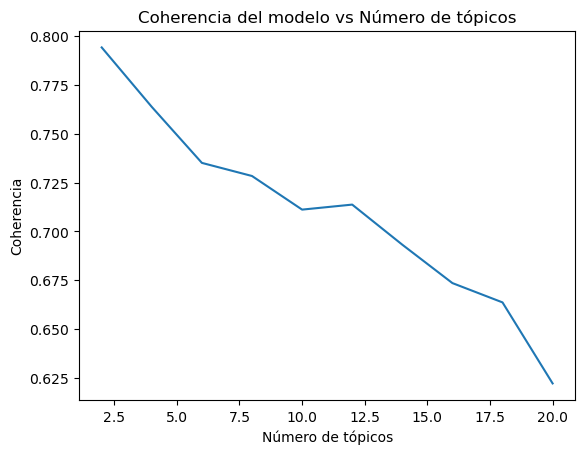

In [36]:
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary
import matplotlib.pyplot as plt

processed_docs = df['processed_text'].apply(lambda x: x.split()).tolist()
dictionary = Dictionary(processed_docs)
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

coherence_scores = []
for n in range(2, 21, 2):
    lda = LdaModel(corpus=corpus, num_topics=n, id2word=dictionary, random_state=42)
    
    cm = CoherenceModel(
        model=lda,
        texts=processed_docs,
        dictionary=dictionary,
        coherence='c_v'
    )
    coherence_scores.append(cm.get_coherence())

plt.plot(range(2, 21, 2), coherence_scores)
plt.xlabel('Número de tópicos')
plt.ylabel('Coherencia')
plt.title('Coherencia del modelo vs Número de tópicos')
plt.show()


#### El gráfico de barras muestra cuántos documentos están principalmente asociados con cada tópico

#### La visualización ayuda a entender qué temas son más comunes en el podcast y si hay una distribución equilibrada de tópicos.

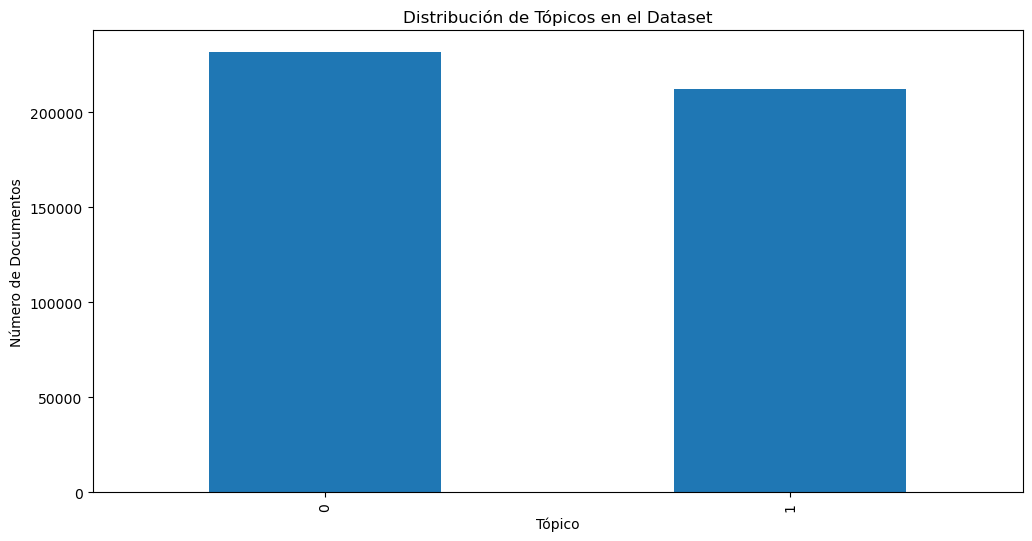

In [37]:
doc_topics = lda_output.argmax(axis=1)
df['dominant_topic'] = doc_topics

topic_distribution = df['dominant_topic'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
topic_distribution.plot(kind='bar')
plt.title('Distribución de Tópicos en el Dataset')
plt.xlabel('Tópico')
plt.ylabel('Número de Documentos')
plt.show()


Esta salida muestra los resultados de un análisis de tópicos LDA:

- Hay 10 tópicos identificados
- La distribución de documentos está concentrada en los primeros dos tópicos:
  - Tópico 0: 231,484 documentos (palabras clave: really, think, years, interesting, thats)
  - Tópico 1: 212,058 documentos (palabras clave: little, okay, bit, learning, data)
  - Tópicos 2-9: 0 documentos 

Esta distribución sugiere que el modelo está encontrando principalmente dos grandes grupos temáticos en las transcripciones del podcast, aunque podría indicar que necesita ajustes para capturar mejor la variedad de temas.

In [ ]:
print("Número de tópicos:", len(lda_model.components_))
print("Longitud de topic_distribution:", len(topic_distribution))

topic_stats = pd.DataFrame({
    'Número de Documentos': [len(df[df['dominant_topic'] == i]) for i in range(len(lda_model.components_))],
    'Palabras Clave': [', '.join([feature_names[i] for i in topic.argsort()[:-5-1:-1]]) 
                       for topic in lda_model.components_]
})

print("\nEstadísticas por Tópico:")
print(topic_stats)

Número de tópicos: 10
Longitud de topic_distribution: 2

Estadísticas por Tópico:
   Número de Documentos                            Palabras Clave
0                231484  really, think, years, interesting, thats
1                212058         little, okay, bit, learning, data
2                     0               im, time, yes, people, good
3                     0           youre, like, kind, love, theyre
4                     0          things, people, na, think, thing
5                     0             like, think, people, know, uh
6                     0       yeah, different, oh, thats, problem
7                     0               know, dont, like, whats, im
8                     0          thats, think, got, going, people
9                     0          theres, right, make, life, think
